Blocco iniziale da usare sempre

In [2]:
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import fastf1.plotting as f1plt
import fastf1.utils as f1u
from timple.timedelta import strftimedelta
from timple.timedelta import num2timedelta
from fastf1.core import Laps

Q = ff1.get_session(2024, 'Austin', 4)
Q.load()

Q2023 = ff1.get_session(2023, 'Austin', 2)
Q2023.load()

SQ = ff1.get_session(2024, 'Austin', 2)
SQ.load()

SQ2023 = ff1.get_session(2023, 'Austin', 3)
SQ2023.load()

SR = ff1.get_session(2024, 'Austin', 3)
SR.load()

SR2023 = ff1.get_session(2023, 'Austin', 4)
SR2023.load()

R = ff1.get_session(2024, 'Austin', 5)
R.load()

R2023 = ff1.get_session(2023, 'Austin', 5)
R2023.load()

drivers = ['NOR', 'VER', 'SAI', 'LEC', 'PIA', 'RUS', 'GAS', 'ALO', 'MAG', 'PER', 'TSU', 'HUL', 'OCO', 'STR', 'LAW', 'ALB', 'COL', 'BOT', 'HAM', 'ZHO']
drivers2023 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA', 'TSU', 'ZHO', 'BOT', 'MAG', 'RIC', 'HUL', 'ALO', 'ALB', 'STR', 'SAR']

req         WARNING 	DEFAULT CACHE ENABLED! (491.04 MB) C:\Users\giacomotommi\AppData\Local\Temp\fastf1
core           INFO 	Loading data for United States Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2024/19/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\requests_cache\session.py", line 291, in _resend
    response.raise_for_status()
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\requests\models.py", line 1024, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2024/19/qualifying.json


Velocità massima sul rettilineo 2023 e 2024   (10)

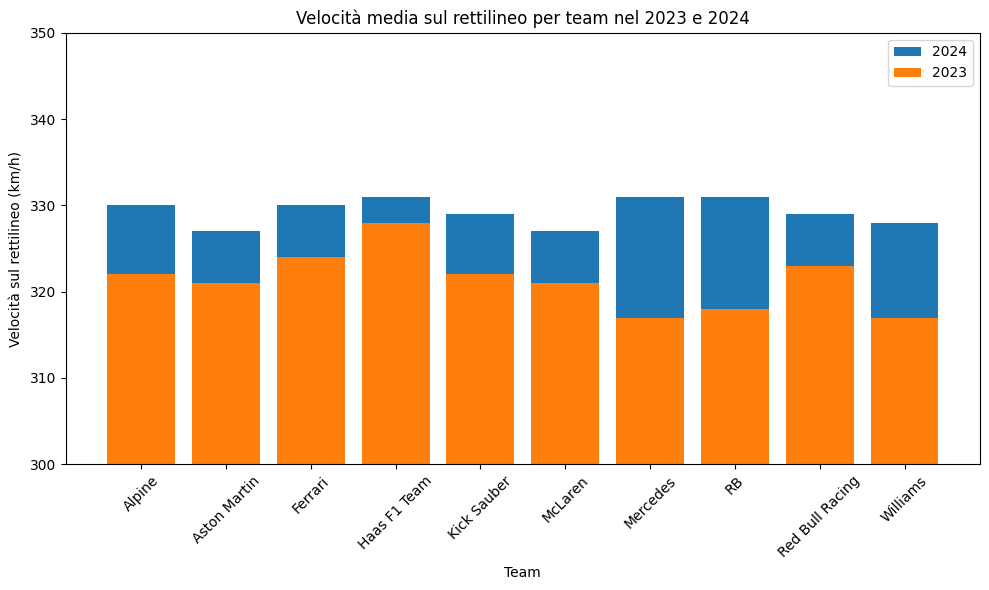

In [3]:
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

velocita_media_sul_dritto_2024 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = pd.concat([velocita_media_sul_dritto_2024, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2024 = velocita_media_sul_dritto_2024.groupby('Team').mean().round(0)

Q1, Q2, Q3 = Q2023.laps.split_qualifying_sessions()
velocita_media_sul_dritto_2023 = Q1.pick_quicklaps()[["Team", "SpeedST"]]
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q2.pick_quicklaps()[["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = pd.concat([velocita_media_sul_dritto_2023, Q3.pick_quicklaps().loc[:, ["Team", "SpeedST"]]])
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.groupby('Team').mean().round(0)
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.rename(index={'Alfa Romeo': 'Kick Sauber', 'AlphaTauri': 'RB'})
velocita_media_sul_dritto_2023 = velocita_media_sul_dritto_2023.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(velocita_media_sul_dritto_2024.index, velocita_media_sul_dritto_2024['SpeedST'], label='2024')
plt.bar(velocita_media_sul_dritto_2023.index, velocita_media_sul_dritto_2023['SpeedST'], label='2023')
plt.xlabel('Team')
plt.ylabel('Velocità sul rettilineo (km/h)')
plt.title('Velocità media sul rettilineo per team nel 2023 e 2024')
plt.legend()
plt.ylim(300, 350)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafico giri veloci in gara   (12)

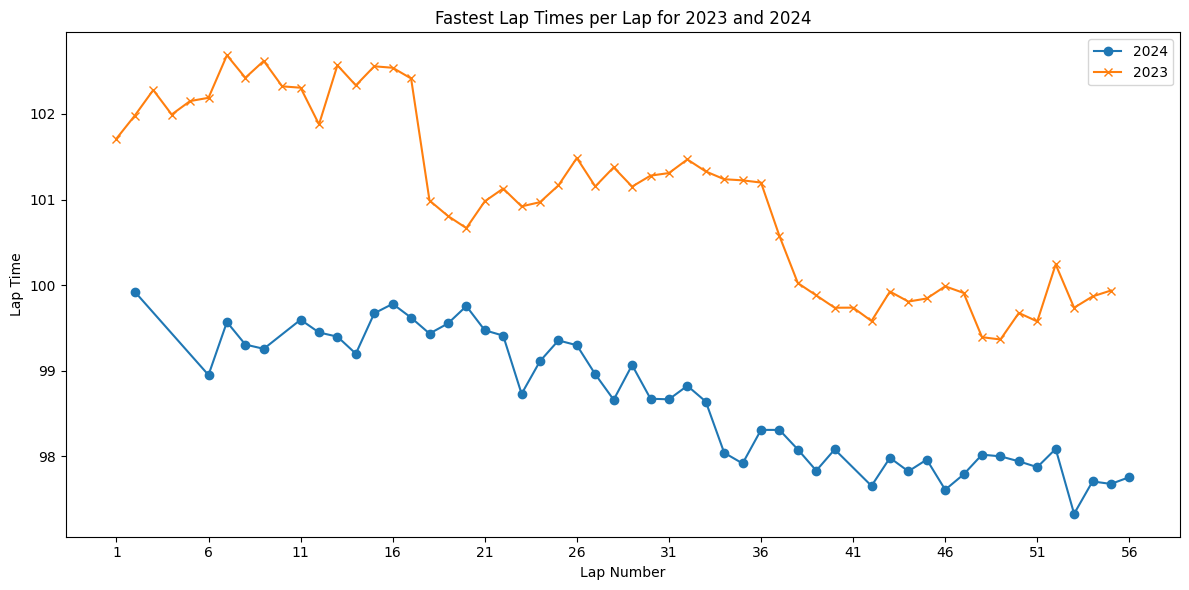

In [4]:
race_2024_fastest_laps = pd.DataFrame()
race_2023_fastest_laps = pd.DataFrame()

for i in range(1, 57):
    fastest_lap = R.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2024_fastest_laps = pd.concat([race_2024_fastest_laps, fastest_lap])

for i in range(1, 57):
    fastest_lap = R2023.laps.pick_laps(i).sort_values(by='LapTime')[['Driver', 'LapNumber', 'LapTime', 'TrackStatus']].head(1)
    fastest_lap['LapTime'] = fastest_lap['LapTime'].apply(lambda x: x.total_seconds())
    fastest_lap = fastest_lap[fastest_lap['TrackStatus'] == '1']
    race_2023_fastest_laps = pd.concat([race_2023_fastest_laps, fastest_lap])
    
plt.figure(figsize=(12, 6))

plt.plot(race_2024_fastest_laps['LapNumber'], race_2024_fastest_laps['LapTime'], marker='o', label='2024')
plt.plot(race_2023_fastest_laps['LapNumber'], race_2023_fastest_laps['LapTime'], marker='x', label='2023')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Fastest Lap Times per Lap for 2023 and 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.tight_layout()
plt.show()


c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\giacomotommi\Documents\.Tutta la Programmazione dell'Uni\Python x Visu\.venv\Lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


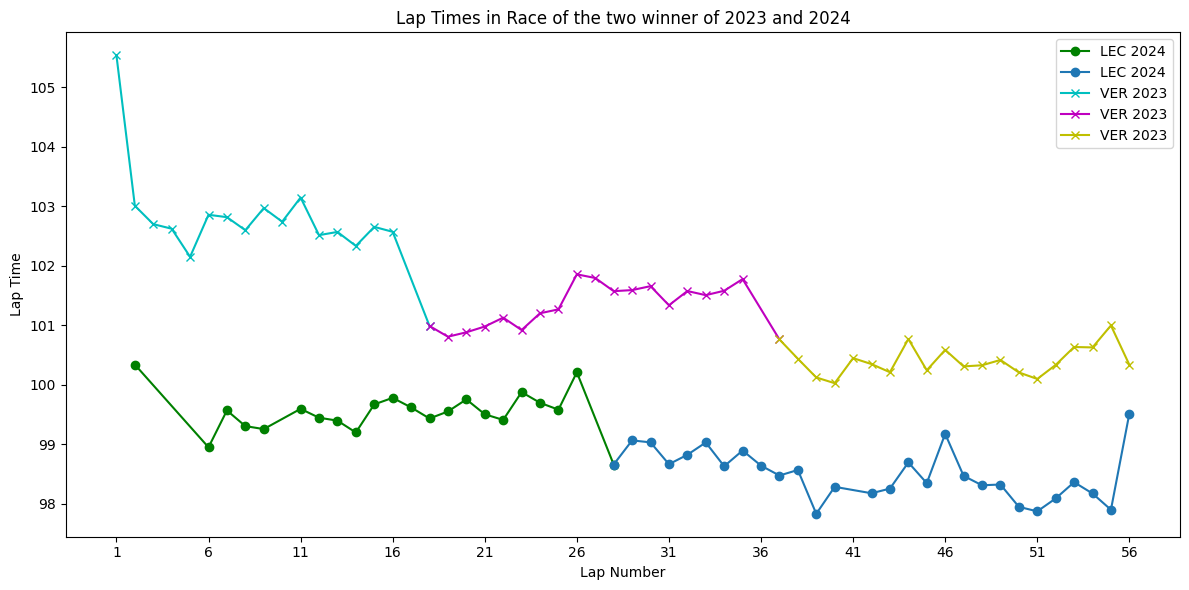

In [5]:
laps_vincitore_2024 = R.laps.pick_driver('LEC').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2024['LapTime'] = laps_vincitore_2024['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2024 = laps_vincitore_2024[laps_vincitore_2024['TrackStatus'] == '1']

laps_vincitore_2023 = R2023.laps.pick_driver('VER').pick_quicklaps()[['Driver', 'LapNumber', 'LapTime', 'TrackStatus', 'Compound', 'TyreLife']]
laps_vincitore_2023['LapTime'] = laps_vincitore_2023['LapTime'].apply(lambda x: x.total_seconds())
laps_vincitore_2023 = laps_vincitore_2023[laps_vincitore_2023['TrackStatus'] == '1']

laps_primoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] <= 28.0]
laps_secondoStint_2024 = laps_vincitore_2024[laps_vincitore_2024['LapNumber'] >= 28.0]

laps_primoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] <= 18.0]
laps_secondoStint_2023 = laps_vincitore_2023[(laps_vincitore_2023['LapNumber'] >= 18.0) & (laps_vincitore_2023['LapNumber'] <= 37.0)]
laps_terzoStint_2023 = laps_vincitore_2023[laps_vincitore_2023['LapNumber'] >= 37.0]


plt.figure(figsize=(12, 6))

plt.plot(laps_primoStint_2024['LapNumber'], laps_primoStint_2024['LapTime'], marker='o', c='g', label='LEC 2024')
plt.plot(laps_secondoStint_2024['LapNumber'], laps_secondoStint_2024['LapTime'], marker='o', label='LEC 2024')
plt.plot(laps_primoStint_2023['LapNumber'], laps_primoStint_2023['LapTime'], marker='x', c='c', label='VER 2023')
plt.plot(laps_secondoStint_2023['LapNumber'], laps_secondoStint_2023['LapTime'], marker='x', c='m', label='VER 2023')
plt.plot(laps_terzoStint_2023['LapNumber'], laps_terzoStint_2023['LapTime'], marker='x', c='y', label='VER 2023')

plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Times in Race of the two winner of 2023 and 2024')
plt.legend()
plt.xticks(np.arange(1, 57, 5))
plt.tight_layout()
plt.show()

Grafico Velocità media in qualifica  (3)

   Driver  SpeedI1  SpeedI2  SpeedFL  SpeedST             Team  SpeedAvg
0     NOR    239.0    189.0    210.0    326.0          McLaren    241.00
1     VER    244.0    191.0    211.0    328.0  Red Bull Racing    243.50
2     SAI    241.0    192.0    212.0    330.0          Ferrari    243.75
3     LEC    241.0    193.0    213.0    330.0          Ferrari    244.25
4     PIA    241.0    190.0    210.0    324.0          McLaren    241.25
..    ...      ...      ...      ...      ...              ...       ...
79    HAM    242.0    191.0    208.0    331.0         Mercedes    243.00
80    HAM    243.0    187.0    210.0    332.0         Mercedes    243.00
81    ZHO    230.0    186.0    211.0    327.0      Kick Sauber    238.50
82    ZHO    230.0    184.0    208.0    329.0      Kick Sauber    237.75
83    ZHO    234.0    192.0    209.0    330.0      Kick Sauber    241.25

[84 rows x 7 columns]
   Driver  SpeedI1  SpeedI2  SpeedFL  SpeedST             Team  SpeedAvg
0     LEC    232.0    192.0 

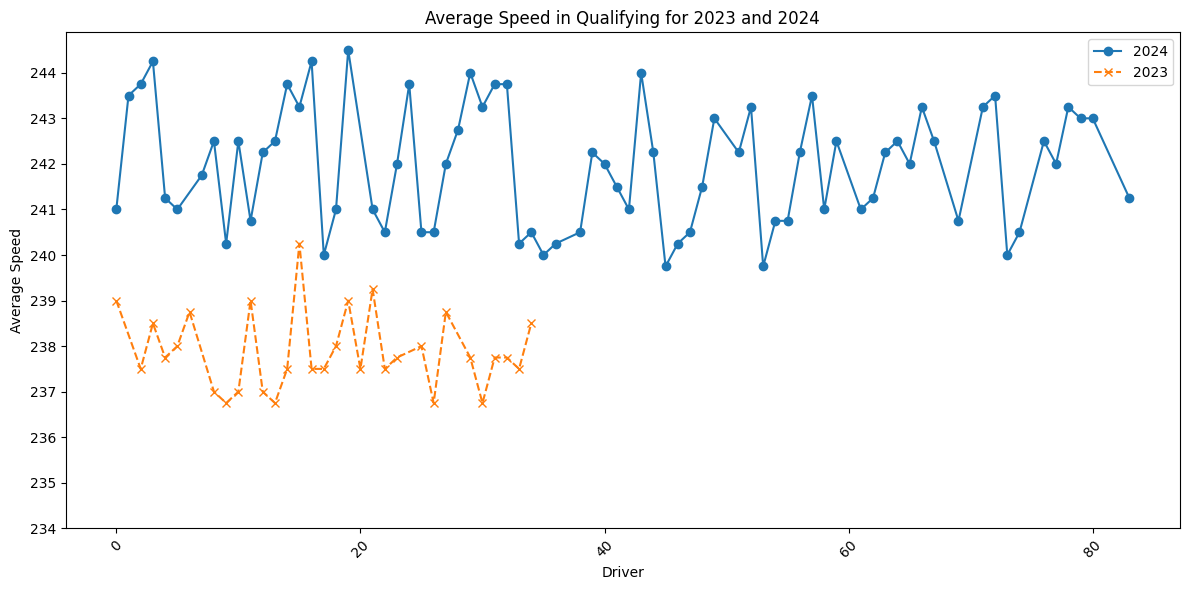

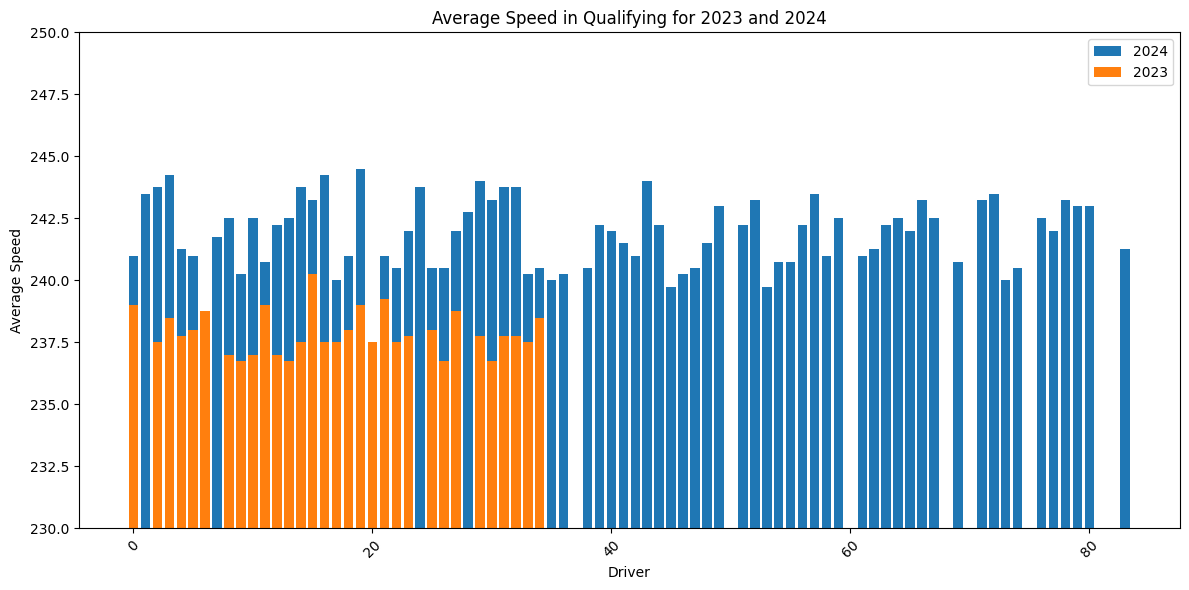

In [ ]:
Q1, Q2, Q3 = Q.laps.split_qualifying_sessions()

avg_speed_2024 = Q3.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
avg_speed_2024 = pd.concat([avg_speed_2024, Q2.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]])
speedAvg2024 = avg_speed_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2024 = avg_speed_2024.assign(SpeedAvg=speedAvg2024)
avg_speed_2024 = avg_speed_2024.reset_index(drop=True)#.reset_index().rename(columns={'index': 'Tentativo'})
print(avg_speed_2024)

Q1_2023, Q2_2023, Q3_2023 = Q2023.laps.split_qualifying_sessions()

avg_speed_2023 = Q3_2023.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
avg_speed_2023 = pd.concat([avg_speed_2023, Q2_2023.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]])
speedAvg2023 = avg_speed_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2023 = avg_speed_2023.assign(SpeedAvg=speedAvg2023)
avg_speed_2023 = avg_speed_2023.reset_index(drop=True).head(35)#.reset_index().rename(columns={'index': 'Tentativo'})
print(avg_speed_2023)

avg_speed_2024 = avg_speed_2024[(avg_speed_2024['SpeedAvg'] > avg_speed_2024['SpeedAvg'].quantile(0.05)) & (avg_speed_2024['SpeedAvg'] < avg_speed_2024['SpeedAvg'].quantile(0.95))]
avg_speed_2023 = avg_speed_2023[(avg_speed_2023['SpeedAvg'] > avg_speed_2023['SpeedAvg'].quantile(0.05)) & (avg_speed_2023['SpeedAvg'] < avg_speed_2023['SpeedAvg'].quantile(0.95))]



plt.figure(figsize=(12, 6))

plt.plot(avg_speed_2024.index, avg_speed_2024['SpeedAvg'], marker='o', linestyle='-', label='2024')
plt.plot(avg_speed_2023.index, avg_speed_2023['SpeedAvg'], marker='x', linestyle='--', label='2023')
plt.xlabel('Driver')
plt.ylabel('Average Speed')
plt.title('Average Speed in Qualifying for 2023 and 2024')
plt.legend()
plt.xticks(rotation=45)
plt.yticks(np.arange(234, 245, 1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.bar(avg_speed_2024.index, avg_speed_2024['SpeedAvg'], label='2024')
plt.bar(avg_speed_2023.index, avg_speed_2023['SpeedAvg'],  label='2023')

plt.xlabel('Driver')
plt.ylabel('Average Speed')
plt.title('Average Speed in Qualifying for 2023 and 2024')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(230, 250)
plt.tight_layout()
plt.show()

Confronto quali sprint (venerdì) e quali normale (sabato) del 2024 per vedere la gommatura (14)

               Driver  LapNumber                LapTime
DriverPosition                                         
1                 NOR       13.0 0 days 00:01:32.330000
2                 VER       14.0 0 days 00:01:32.361000
3                 SAI       16.0 0 days 00:01:32.652000
4                 LEC       17.0 0 days 00:01:32.740000
5                 PIA       16.0 0 days 00:01:32.950000
6                 RUS       12.0 0 days 00:01:32.974000
7                 GAS       17.0 0 days 00:01:33.018000
8                 ALO       17.0 0 days 00:01:33.309000
9                 MAG       14.0 0 days 00:01:33.481000
               Driver  LapNumber                LapTime
DriverPosition                                         
1                 VER       11.0 0 days 00:01:32.833000
2                 RUS       13.0 0 days 00:01:32.845000
3                 LEC       11.0 0 days 00:01:33.059000
4                 NOR       13.0 0 days 00:01:33.083000
5                 SAI       11.0 0 days 00:01:33

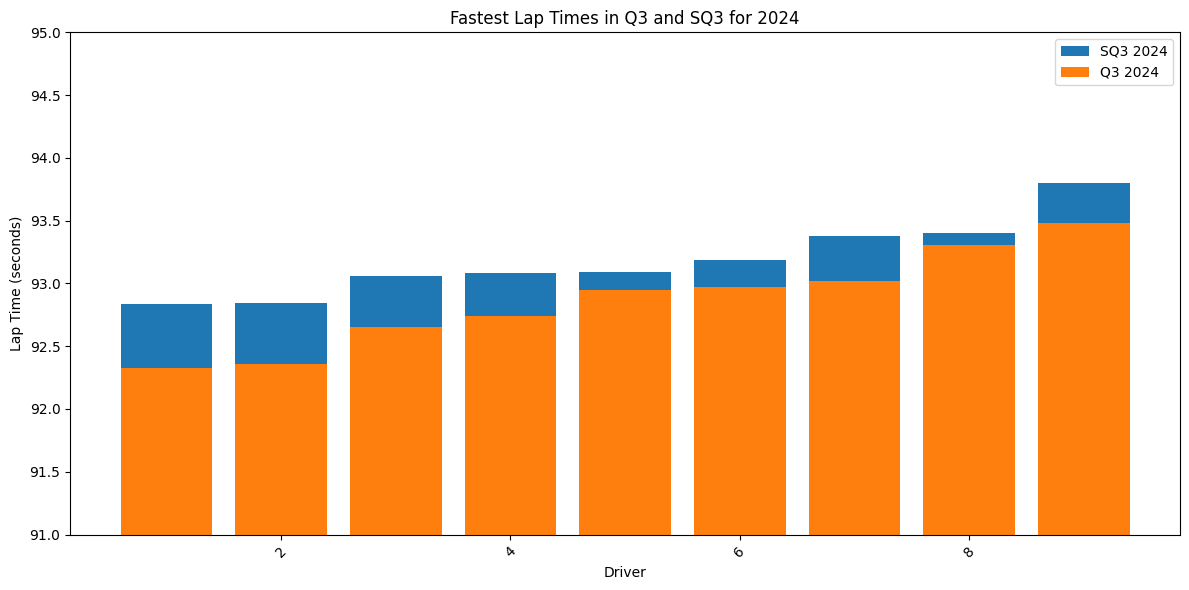

In [7]:
_, _, SQ3 = SQ.laps.split_qualifying_sessions()
_, _, Q3= Q.laps.split_qualifying_sessions()

driversQ3 = pd.unique(Q.laps['Driver'])[:9]
driversSQ3 = ['VER', 'RUS', 'LEC', 'NOR', 'SAI','HUL', 'HAM', 'MAG', 'TSU']

fastest_laps_Q3 = pd.DataFrame()
fastest_laps_SQ3 = pd.DataFrame()

i = 1
for driver in driversQ3:
    fastest_lap = Q3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3 = pd.concat([fastest_laps_Q3, fastest_lap])

i = 1
for driver in driversSQ3:
    fastest_lap = SQ3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3 = pd.concat([fastest_laps_SQ3, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3.set_index("DriverPosition", inplace=True)
fastest_laps_Q3.set_index("DriverPosition", inplace=True)
print(fastest_laps_Q3)
print(fastest_laps_SQ3)
# Plot the fastest lap times for Q3 and SQ3
plt.figure(figsize=(12, 6))


plt.bar(fastest_laps_SQ3.index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()),  label='SQ3 2024')
plt.bar(fastest_laps_Q3.index, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()),  label='Q3 2024')

plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q3 and SQ3 for 2024')
plt.legend()
plt.ylim(91, 95)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

               Driver  LapNumber                LapTime
DriverPosition                                         
1                 LEC       20.0 0 days 00:01:34.723000
2                 NOR       19.0 0 days 00:01:34.853000
3                 HAM       17.0 0 days 00:01:34.862000
4                 SAI       17.0 0 days 00:01:34.945000
5                 RUS       17.0 0 days 00:01:35.079000
6                 VER       17.0 0 days 00:01:34.718000
7                 GAS       18.0 0 days 00:01:35.089000
8                 OCO       20.0 0 days 00:01:35.154000
9                 PER       16.0 0 days 00:01:35.173000
10                PIA       19.0 0 days 00:01:35.467000
               Driver  LapNumber                LapTime
DriverPosition                                         
1                 VER       10.0 0 days 00:01:34.538000
2                 LEC       13.0 0 days 00:01:34.593000
3                 HAM       11.0 0 days 00:01:34.607000
4                 NOR       14.0 0 days 00:01:34

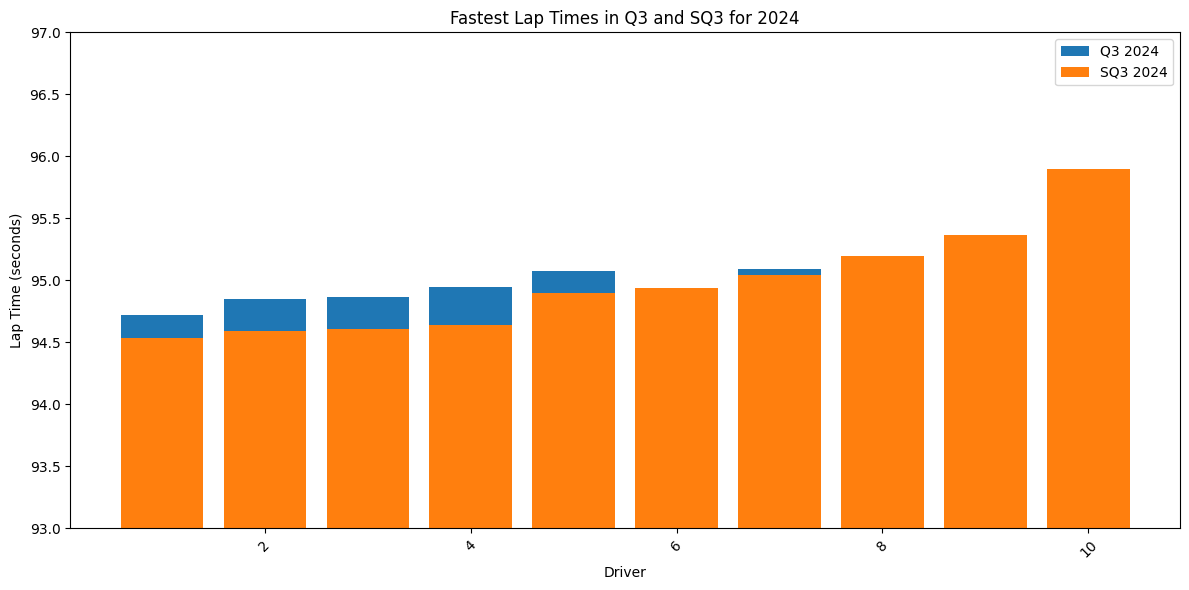

In [8]:
_, _, SQ3 = SQ2023.laps.split_qualifying_sessions()
_, _, Q3= Q2023.laps.split_qualifying_sessions()

driversQ3 = ['LEC', 'NOR', 'HAM', 'SAI', 'RUS', 'VER', 'GAS', 'OCO', 'PER', 'PIA']
driversSQ3 = ['VER', 'LEC', 'HAM', 'NOR', 'PIA','SAI', 'PER', 'RUS', 'ALB', 'GAS']

fastest_laps_Q3 = pd.DataFrame()
fastest_laps_SQ3 = pd.DataFrame()

i = 1
for driver in driversQ3:
    fastest_lap = Q3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_Q3 = pd.concat([fastest_laps_Q3, fastest_lap])

i = 1
for driver in driversSQ3:
    fastest_lap = SQ3.pick_drivers(driver).loc[:, ['Driver', 'LapNumber', 'LapTime']].sort_values(by='LapTime').head(1)
    fastest_lap = fastest_lap.assign(DriverPosition = i)
    i += 1
    fastest_laps_SQ3 = pd.concat([fastest_laps_SQ3, fastest_lap])

#fastest_laps_SQ3 = fastest_laps_SQ3.sort_index()
fastest_laps_SQ3.set_index("DriverPosition", inplace=True)
fastest_laps_Q3.set_index("DriverPosition", inplace=True)
print(fastest_laps_Q3)
print(fastest_laps_SQ3)
# Plot the fastest lap times for Q3 and SQ3
plt.figure(figsize=(12, 6))

plt.bar(fastest_laps_Q3.index, fastest_laps_Q3['LapTime'].apply(lambda x: x.total_seconds()),  label='Q3 2024')
plt.bar(fastest_laps_SQ3.index, fastest_laps_SQ3['LapTime'].apply(lambda x: x.total_seconds()),  label='SQ3 2024')

plt.xlabel('Driver')
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Times in Q3 and SQ3 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.ylim(93, 97)
plt.tight_layout()
plt.show()

Coefficiente di carico aereodinamico (velocità media / velocità max)

C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\2342359420.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2024 = pd.concat([max_speed_team_2024, row])
C:\Users\giacomotommi\AppData\Local\Temp\ipykernel_3320\2342359420.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_speed_team_2023 = pd.concat([max_speed_team_2023, row])


              Team  SpeedST  SpeedAvg
0         Williams    324.0    236.50
0  Red Bull Racing    324.0    235.25
0               RB    320.0    235.50
0         Mercedes    320.0    236.50
0          McLaren    324.0    234.75
0      Kick Sauber    325.0    234.25
0     Haas F1 Team    330.0    236.50
0          Ferrari    327.0    238.00
0     Aston Martin    324.0    237.25
0           Alpine    324.0    233.75
              Team  SpeedST  SpeedAvg
0         Williams    329.0    240.00
0  Red Bull Racing    333.0    240.50
0               RB    334.0    250.00
0         Mercedes    332.0    241.50
0          McLaren    330.0    240.00
0      Kick Sauber    330.0    242.50
0     Haas F1 Team    333.0    242.25
0          Ferrari    333.0    242.00
0     Aston Martin    328.0    239.75
0           Alpine    332.0    239.50
0    72.948328
0    72.222222
0    74.850299
0    72.740964
0    72.727273
0    73.484848
0    72.747748
0    72.672673
0    73.094512
0    72.138554
dtype: float64

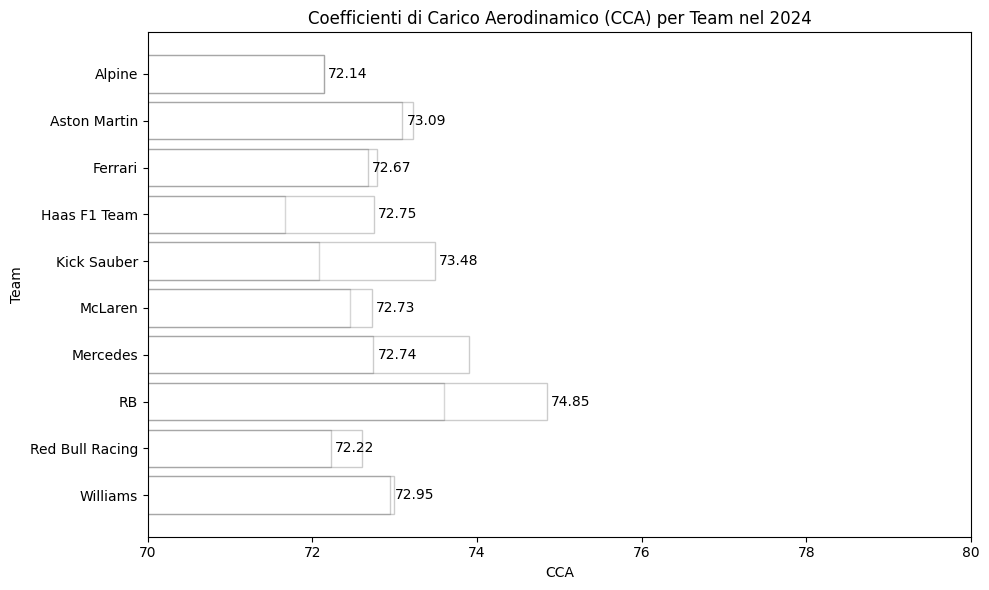

In [50]:
#velocità media qualifiche 2024
avg_speed_2024 = Q.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2024 = avg_speed_2024.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2024 = avg_speed_2024.assign(SpeedAvg=speedAvg2024)
avg_speed_2024 = avg_speed_2024.reset_index(drop=True)

#velocità media qualifiche 2023
avg_speed_2023 = Q2023.laps.pick_quicklaps().loc[:, ['Driver', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Team']]
speedAvg2023 = avg_speed_2023.loc[:, ['SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST']].mean(axis=1)
avg_speed_2023 = avg_speed_2023.assign(SpeedAvg=speedAvg2023)
avg_speed_2023 = avg_speed_2023.reset_index(drop=True)

# ottengo la velocità media per scuderia
avg_media_per_scuderia_2023 = avg_speed_2023[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)
avg_media_per_scuderia_2024 = avg_speed_2024[['SpeedAvg', 'Team']].groupby('Team').mean().round(0)

#ottengo i singoli team
team = pd.unique(Q.laps['Team'])

# creo un dataframe per i team con la velocità media e la velocità massima
max_speed_team_2024 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
max_speed_team_2023 = pd.DataFrame(columns=['Team', 'SpeedST' ,'SpeedAvg'])
for i in team:
    max_speed = Q.laps[Q.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2024[avg_speed_2024['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2024 = pd.concat([max_speed_team_2024, row])

    if i == 'Kick Sauber':
        i = 'Alfa Romeo'

    if i == 'RB':
        i = 'AlphaTauri'

    max_speed = Q2023.laps[Q2023.laps['Team'] == i]
    max_speed = max_speed[['SpeedST']].max(axis=0)
    spg = avg_speed_2023[avg_speed_2023['Team'] == i]
    spg = spg[['SpeedAvg']]
    row = pd.DataFrame({'Team': i, 'SpeedST': max_speed['SpeedST'], 'SpeedAvg': spg['SpeedAvg'].values[0]}, index=[0])
    max_speed_team_2023 = pd.concat([max_speed_team_2023, row])

# calcolo cca del 2024
max_speed_team_2024 = max_speed_team_2024.sort_values(by='Team', ascending=False)
CCA_scuderie_2024 = max_speed_team_2024['SpeedAvg'] / max_speed_team_2024['SpeedST']
CCA_scuderie_2024 = CCA_scuderie_2024 * 100

# calcolo cca del 2023
max_speed_team_2023['Team'] = max_speed_team_2023['Team'].replace({'AlphaTauri': 'RB', 'Alfa Romeo': 'Kick Sauber'})
max_speed_team_2023 = max_speed_team_2023.sort_values(by='Team', ascending=False)
print(max_speed_team_2023)
print(max_speed_team_2024)
CCA_scuderie_2023 = max_speed_team_2023['SpeedAvg'] / max_speed_team_2023['SpeedST']
CCA_scuderie_2023 = CCA_scuderie_2023 * 100

print(CCA_scuderie_2024)
print(CCA_scuderie_2023)

plt.figure(figsize=(10, 6))
plt.barh(max_speed_team_2023['Team'], CCA_scuderie_2023, color='white', edgecolor='black', alpha=0.2)

plt.barh(max_speed_team_2024['Team'], CCA_scuderie_2024, color='white', edgecolor='black', alpha=0.2)
plt.xlabel('CCA')
plt.ylabel('Team')
plt.title('Coefficienti di Carico Aerodinamico (CCA) per Team nel 2024')
plt.xlim(70,80)
plt.tight_layout()
for index, value in enumerate(CCA_scuderie_2024):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')
plt.show()